# Data

## Import Library

In [2]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
data = pd.read_csv("/content/train-chennai-sale.csv")
data.shape

(7109, 22)

In [5]:
data.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [6]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

## Data cleaning

1) Missing Values

In [7]:
# Finding null values

data.isna().sum()


PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
data.dropna(inplace=True)

We are droping the na values rows as they are less then 60% data

In [9]:
data.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

2) Duplicates

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7104    False
7105    False
7106    False
7107    False
7108    False
Length: 7056, dtype: bool

3) Data not in right format

In [11]:
data.head(3).T

0           1           2
PRT_ID             P03210      P09411      P01812
AREA           Karapakkam  Anna Nagar       Adyar
INT_SQFT             1004        1986         909
DATE_SALE      04-05-2011  19-12-2006  04-02-2012
DIST_MAINROAD         131          26          70
N_BEDROOM             1.0         2.0         1.0
N_BATHROOM            1.0         1.0         1.0
N_ROOM                  3           5           3
SALE_COND        AbNormal    AbNormal    AbNormal
PARK_FACIL            Yes          No         Yes
DATE_BUILD     15-05-1967  22-12-1995  09-02-1992
BUILDTYPE      Commercial  Commercial  Commercial
UTILITY_AVAIL      AllPub      AllPub         ELO
STREET              Paved      Gravel      Gravel
MZZONE                  A          RH          RL
QS_ROOMS              4.0         4.9         4.1
QS_BATHROOM           3.9         4.2         3.8
QS_BEDROOM            4.9         2.5         2.2
QS_OVERALL           4.33       3.765        3.09
REG_FEE            380000      760122      421094
COMMIS             144400      304049       92114
SALES_PRICE       7600000    21717770    13159200

From data and domain understanding we are making the below interpretation.

PRT_ID - Alphanumeric - object

AREA - String- object

INT_SQFT - integer - Any int

DATE_SALE - date - date or object

DIST_MAINROAD - integer - any int

N_BEDROOM - Continuous float - float

N_BATHROOM - float - float

N_ROOM - categorical int - int

SALE_COND - String - object

PARK_FACIL - String - object

DATE_BUILD - date -object

BUILDTYPE - string - object

UTILITY_AVAIL - Categorical String - object

STREET - Categrocial String - object

MZZONE - Categrical string - object

QS_ROOMS  - Continuous float - float

QS_BATHROOM  - Continuous float - float

QS_BEDROOM  - Continuous float - float

QS_OVERALL  - Continuous float - float

REG_FEE  - Continuous int- int

COMMIS - Continuous int- int

SALES_PRICE - Continuous int- int

In [12]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

4) Outliers

In [13]:
numeric_data = data.select_dtypes(exclude = ['object'])

In [14]:
numeric_data.isna().sum()

INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [15]:
numeric_data.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7056.000000    7056.000000  7056.000000  7056.000000  7056.000000   
mean   1381.316752      99.569161     1.636621     1.213152     3.686650   
std     457.860850      57.403870     0.803633     0.409563     1.020011   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     991.000000      50.000000     1.000000     1.000000     3.000000   
50%    1369.500000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7056.000000  7056.000000  7056.000000  7056.000000    7056.000000   
mean      3.517177     3.505896     3.485332     3.503389  376791.852608   
std       0.892141     0.897644     0.886814     0.527313  143109.581793   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272117.500000   
50%       3.500000     3.500000     3.500000     3.500000  349444.500000   
75%       4.300000     4.300000     4.300000     3.890000  451030.500000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7056.000000  7.056000e+03  
mean   140994.273384  1.088801e+07  
std     78774.465963  3.769081e+06  
min      5055.000000  2.156875e+06  
25%     84212.750000  8.266790e+06  
50%    127640.500000  1.031922e+07  
75%    184449.000000  1.298148e+07  
max    495405.000000  2.366734e+07

Changing columns to date time

In [16]:
val = data.head(1).T[0].to_dict()
val

{'PRT_ID': 'P03210',
 'AREA': 'Karapakkam',
 'INT_SQFT': 1004,
 'DATE_SALE': '04-05-2011',
 'DIST_MAINROAD': 131,
 'N_BEDROOM': 1.0,
 'N_BATHROOM': 1.0,
 'N_ROOM': 3,
 'SALE_COND': 'AbNormal',
 'PARK_FACIL': 'Yes',
 'DATE_BUILD': '15-05-1967',
 'BUILDTYPE': 'Commercial',
 'UTILITY_AVAIL': 'AllPub',
 'STREET': 'Paved',
 'MZZONE': 'A',
 'QS_ROOMS': 4.0,
 'QS_BATHROOM': 3.9,
 'QS_BEDROOM': 4.9,
 'QS_OVERALL': 4.33,
 'REG_FEE': 380000,
 'COMMIS': 144400,
 'SALES_PRICE': 7600000}

In [17]:
import re
for key,value in val.items():
  if re.search(r'\d{2}-\d{2}-\d{4}', str(value)):
    data[key] = pd.to_datetime(data[key], format='%d-%m-%Y')
data.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [18]:
# Finding the outliers
def removeOutliers(numeric_data, col):
  numeric_data.dropna(inplace=True)
  Q3 = np.quantile(numeric_data[col], 0.75)
  Q1 = np.quantile(numeric_data[col], 0.25)
  IQR = Q3 - Q1
  print("IQR value for column %s is: %s" % (col, IQR))
  global outlier_free_list
  global filtered_data

  lower_range = Q1 - 1.5 * IQR
  upper_range = Q3 + 1.5 * IQR
  outlier_free_list = [x for x in numeric_data[col] if (
      (x > lower_range) & (x < upper_range))]
  filtered_data = numeric_data.loc[data[col].isin(outlier_free_list)]
 
for i in numeric_data.columns:
    removeOutliers(numeric_data, i)


IQR value for column INT_SQFT is: 753.0
IQR value for column DIST_MAINROAD is: 98.0
IQR value for column N_BEDROOM is: 1.0
IQR value for column N_BATHROOM is: 0.0
IQR value for column N_ROOM is: 1.0
IQR value for column QS_ROOMS is: 1.5999999999999996
IQR value for column QS_BATHROOM is: 1.5999999999999996
IQR value for column QS_BEDROOM is: 1.5999999999999996
IQR value for column QS_OVERALL is: 0.7600000000000002
IQR value for column REG_FEE is: 178913.0
IQR value for column COMMIS is: 100236.25
IQR value for column SALES_PRICE is: 4714687.5


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


No need for Structured data conversion as the data is good.

Data spelling correction

Taking list of columns with datatype 'Object'

In [19]:
spellCol = []
for i, j in enumerate(data.dtypes):
  if j == 'object':
   spellCol.append(data.columns[i])

spellCol

['PRT_ID',
 'AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

Checking for categorical data

In [20]:
j = {}
for i in spellCol[1:]:
  j[i] = data[i].str.lower().unique()
j

{'AREA': array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
        'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
        'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
        'kknagar'], dtype=object),
 'SALE_COND': array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
        'ab normal', 'partiall', 'adj land'], dtype=object),
 'PARK_FACIL': array(['yes', 'no', 'noo'], dtype=object),
 'BUILDTYPE': array(['commercial', 'others', 'other', 'house', 'comercial'],
       dtype=object),
 'UTILITY_AVAIL': array(['allpub', 'elo', 'nosewr ', 'nosewa', 'all pub'], dtype=object),
 'STREET': array(['paved', 'gravel', 'no access', 'pavd', 'noaccess'], dtype=object),
 'MZZONE': array(['a', 'rh', 'rl', 'i', 'c', 'rm'], dtype=object)}

In [21]:
data['AREA'] = data['AREA'].replace({
                        'Karapakam':'Karapakkam', 
                        'Velchery':'Velachery', 
                       'KKNagar':'KK Nagar', 
                       'TNagar':'T Nagar', 
                       'Chormpet':'Chrompet', 
                       'Chrompt':'Chrompet', 
                       'Chrmpet':'Chrompet', 
                       'Ana Nagar':'Anna Nagar', 
                       'Ann Nagar':'Anna Nagar',
                       'Adyr':'Adyar'})

In [22]:
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [23]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [24]:
data.SALE_COND = data.SALE_COND.replace({'Adj Land':'AdjLand', 
                       'Normal Sale':'Normal Sale',
                       'PartiaLl':'Partial',
                       'Ab Normal':'AbNormal'})

In [25]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Partiall'], dtype=object)

In [26]:
data.PARK_FACIL = data.PARK_FACIL.replace({'Noo':'No'})
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [27]:
data.BUILDTYPE = data.BUILDTYPE.replace({'Comercial':'Commercial', 
                       'Others':'Other'})
data.BUILDTYPE.unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [28]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [29]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'All Pub':'AllPub',
                                             'NoSewr ':'NoSeWa'})
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [30]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [31]:
data.STREET = data.STREET.replace({'Pavd':'Paved', 
                       'NoAccess':'No Access'})
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

## Exploratory Data Analysis

Categorical data with Frequency Histogram plots

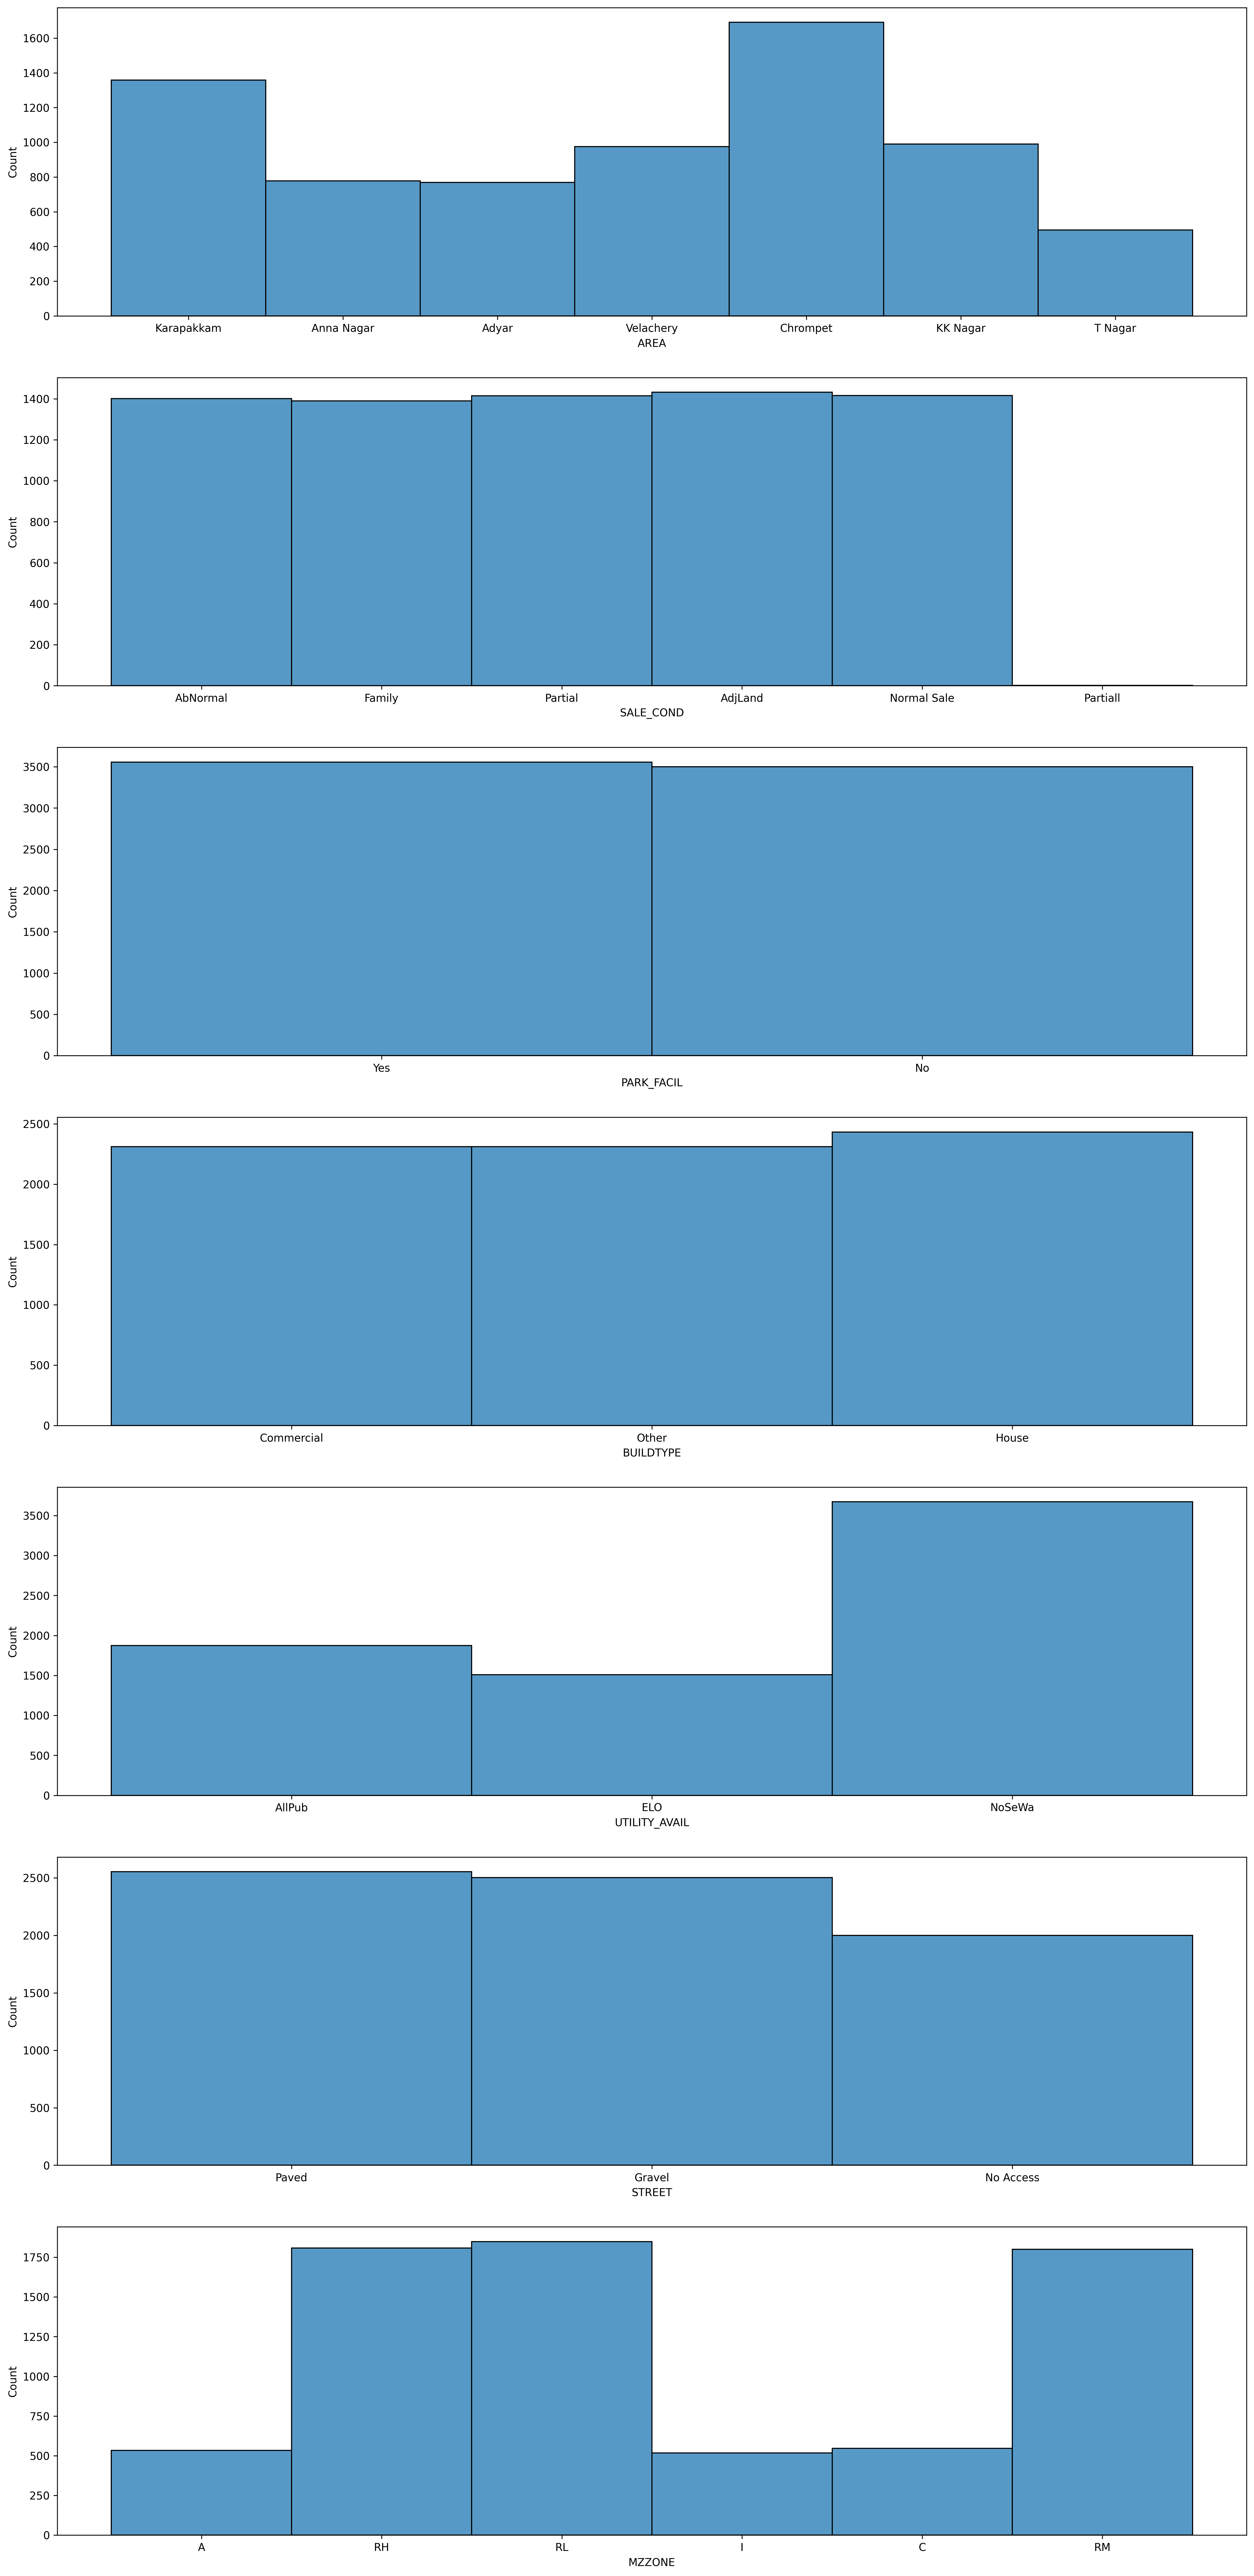

In [32]:
plt.figure(figsize=(20, 50), dpi=300)
k = 1
for i in spellCol[1:]:
  plt.subplot(8,1,k)
  sns.histplot(data[i])
  k += 1

The above data distributions of a categorical variables which are seems to be Normally distributed with few squed data like AREA and MZZONE but does not differ much

Correlation between columns by correlation matrix

In [33]:
correldata = pd.DataFrame(data, columns=data.columns)

matrix = correldata.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
               INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT       1.000000       0.002267   0.786721    0.517103  0.951305   
DIST_MAINROAD  0.002267       1.000000  -0.001938    0.002496  0.002313   
N_BEDROOM      0.786721      -0.001938   1.000000    0.756016  0.840654   
N_BATHROOM     0.517103       0.002496   0.756016    1.000000  0.570110   
N_ROOM         0.951305       0.002313   0.840654    0.570110  1.000000   
QS_ROOMS       0.020495       0.002739   0.015508    0.013487  0.016710   
QS_BATHROOM   -0.007249      -0.030999  -0.006461   -0.011091 -0.006636   
QS_BEDROOM     0.009643       0.001141   0.015810    0.012278  0.015618   
QS_OVERALL     0.013830      -0.017482   0.013932    0.007858  0.015234   
REG_FEE        0.658005       0.011144   0.456759    0.262570  0.631578   
COMMIS         0.571667       0.010203   0.431035    0.258199  0.534058   
SALES_PRICE    0.612668       0.018062   0.332595    0.110984  0.603417   


In [34]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

From the above given data there are some positive and negative correlations between the No of Rooms like N_BedRoom, etc and Price related fields like  REG_FEE, COMMIS, SALES_PRICE

## Plotting between Target that is SALES_PRICE and columns based on the columns

In [35]:
data.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [36]:
len(data['N_BEDROOM'].unique())

4

Splitting numerical data into categorical based on the No of unique values

In [37]:
num_colum = {}
for i, j in enumerate(data.dtypes):
  if j != 'object':
   num_colum[data.columns[i]] = len(data[data.columns[i]].unique())
num_colum

{'INT_SQFT': 1698,
 'DATE_SALE': 2794,
 'DIST_MAINROAD': 201,
 'N_BEDROOM': 4,
 'N_BATHROOM': 2,
 'N_ROOM': 5,
 'DATE_BUILD': 5773,
 'QS_ROOMS': 31,
 'QS_BATHROOM': 31,
 'QS_BEDROOM': 31,
 'QS_OVERALL': 479,
 'REG_FEE': 6986,
 'COMMIS': 6960,
 'SALES_PRICE': 7005}

By eyeball numbers above we could see categorical variables from data like unique count threshold that I am taking here is 31

In [38]:
categorical_columns = spellCol[1:] # ignoring id column
for key, values in num_colum.items():
  if values <= 31:
    categorical_columns.append(key)

categorical_columns

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM']

## Categorical compare with Target data

In [39]:
plt.figure(figsize=(20, 50), dpi=300)
k = 1
for i in categorical_columns[1:]:
  plt.subplot(13,1,k)
  sns.barplot(x=data[i],y=data.SALES_PRICE)
  k += 1

# **Intrepretation**
From the above plots of categical data N_BEDROOM, 

*   N_ROOM is postively increases with Sales Price. It is obvious as the space allocated also will increase
*   In BUILDTYPE price vary based on the commerical one.


*   MZ_ZONE also differs in price based on the type especially high for RM, RH and RL






## **Continous compare with Target data**

In [40]:
# adding column Diff_date =  DATE_SALE - DATE_BUILD

data['DIFF_DATE'] = pd.DatetimeIndex(data.DATE_SALE).year - pd.DatetimeIndex(data.DATE_BUILD).year


In [41]:
numerical_column = []
for i, j in enumerate(data.dtypes):
  if data.columns[i] not in categorical_columns and data.columns[i] not in ['SALES_PRICE','PRT_ID']:
   numerical_column.append(data.columns[i])
numerical_column

['INT_SQFT',
 'DATE_SALE',
 'DIST_MAINROAD',
 'DATE_BUILD',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'DIFF_DATE']

In [42]:
plt.figure(figsize=(20, 50), dpi=300)
k = 1
for i in numerical_column: 
  plt.subplot(len(numerical_column),1,k)
  sns.scatterplot(x=data[i],y=data.SALES_PRICE)
  k += 1

# **Interpretation**



*   Variables like COMMIS, REG FEE, INT_SQFT seems to be more linearly or postively correlated with Sales Price
*   DIST_MAINROAD seems to be constantly distributed

*   From the DATE_SALE the data shows more between 2008 and 2012


*   Sales Price is constant for DIFF_DATE for properties which are less than 45 years







## **Encoding**

Data is nominal for most of the fields, we go for label encoding

In [43]:
cat_data= {}
for i in spellCol[1:]:
  cat_data[i] = data[i].unique()
cat_data

{'AREA': array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
        'KK Nagar', 'T Nagar'], dtype=object),
 'SALE_COND': array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
        'Partiall'], dtype=object),
 'PARK_FACIL': array(['Yes', 'No'], dtype=object),
 'BUILDTYPE': array(['Commercial', 'Other', 'House'], dtype=object),
 'UTILITY_AVAIL': array(['AllPub', 'ELO', 'NoSeWa'], dtype=object),
 'STREET': array(['Paved', 'Gravel', 'No Access'], dtype=object),
 'MZZONE': array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)}

In [44]:
# Label encoding done here

for key, value in cat_data.items():
  temp_dict = {}
  n = 1
  for j in value:
    temp_dict[j] = n
    n += 1
  print(key, temp_dict)
  data[key] = data[key].map(temp_dict)
data.dtypes

AREA {'Karapakkam': 1, 'Anna Nagar': 2, 'Adyar': 3, 'Velachery': 4, 'Chrompet': 5, 'KK Nagar': 6, 'T Nagar': 7}
SALE_COND {'AbNormal': 1, 'Family': 2, 'Partial': 3, 'AdjLand': 4, 'Normal Sale': 5, 'Partiall': 6}
PARK_FACIL {'Yes': 1, 'No': 2}
BUILDTYPE {'Commercial': 1, 'Other': 2, 'House': 3}
UTILITY_AVAIL {'AllPub': 1, 'ELO': 2, 'NoSeWa': 3}
STREET {'Paved': 1, 'Gravel': 2, 'No Access': 3}
MZZONE {'A': 1, 'RH': 2, 'RL': 3, 'I': 4, 'C': 5, 'RM': 6}


PRT_ID                   object
AREA                      int64
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                 int64
PARK_FACIL                int64
DATE_BUILD       datetime64[ns]
BUILDTYPE                 int64
UTILITY_AVAIL             int64
STREET                    int64
MZZONE                    int64
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
DIFF_DATE                 int64
dtype: object

For PARK_FACIL and BUILDTYPE

In [45]:
data.PARK_FACIL = data.PARK_FACIL.map({2:0,1:1})

In [46]:
data.PARK_FACIL.unique()

array([1, 0])

In [47]:
data = pd.get_dummies(data,columns=['BUILDTYPE'])

In [48]:
data.dtypes

PRT_ID                   object
AREA                      int64
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                 int64
PARK_FACIL                int64
DATE_BUILD       datetime64[ns]
UTILITY_AVAIL             int64
STREET                    int64
MZZONE                    int64
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
DIFF_DATE                 int64
BUILDTYPE_1               uint8
BUILDTYPE_2               uint8
BUILDTYPE_3               uint8
dtype: object

In [49]:
data.head(3).T

0                    1                    2
PRT_ID                      P03210               P09411               P01812
AREA                             1                    2                    3
INT_SQFT                      1004                 1986                  909
DATE_SALE      2011-05-04 00:00:00  2006-12-19 00:00:00  2012-02-04 00:00:00
DIST_MAINROAD                  131                   26                   70
N_BEDROOM                      1.0                  2.0                  1.0
N_BATHROOM                     1.0                  1.0                  1.0
N_ROOM                           3                    5                    3
SALE_COND                        1                    1                    1
PARK_FACIL                       1                    0                    1
DATE_BUILD     1967-05-15 00:00:00  1995-12-22 00:00:00  1992-02-09 00:00:00
UTILITY_AVAIL                    1                    1                    2
STREET                           1                    2                    2
MZZONE                           1                    2                    3
QS_ROOMS                       4.0                  4.9                  4.1
QS_BATHROOM                    3.9                  4.2                  3.8
QS_BEDROOM                     4.9                  2.5                  2.2
QS_OVERALL                    4.33                3.765                 3.09
REG_FEE                     380000               760122               421094
COMMIS                      144400               304049                92114
SALES_PRICE                7600000             21717770             13159200
DIFF_DATE                       44                   11                   20
BUILDTYPE_1                      1                    1                    1
BUILDTYPE_2                      0                    0                    0
BUILDTYPE_3                      0                    0                    0

## **Splitting**
Train Test Split 


Both REG_FEE and COMMIS are related to Target data even during scaling this is causing the scaling issue

Removing Date columns too DATE_BUILD and DATE_SALE

In [50]:
final_column = list(data.columns)
final_column = final_column[1:]
final_column.remove('SALES_PRICE') # target column
final_column.remove('REG_FEE') 
final_column.remove('COMMIS')
final_column.remove('DATE_SALE')
final_column.remove('DATE_BUILD')



print(final_column)
input = data[final_column]
input.head(2).T

['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'DIFF_DATE', 'BUILDTYPE_1', 'BUILDTYPE_2', 'BUILDTYPE_3']


0         1
AREA              1.00     2.000
INT_SQFT       1004.00  1986.000
DIST_MAINROAD   131.00    26.000
N_BEDROOM         1.00     2.000
N_BATHROOM        1.00     1.000
N_ROOM            3.00     5.000
SALE_COND         1.00     1.000
PARK_FACIL        1.00     0.000
UTILITY_AVAIL     1.00     1.000
STREET            1.00     2.000
MZZONE            1.00     2.000
QS_ROOMS          4.00     4.900
QS_BATHROOM       3.90     4.200
QS_BEDROOM        4.90     2.500
QS_OVERALL        4.33     3.765
DIFF_DATE        44.00    11.000
BUILDTYPE_1       1.00     1.000
BUILDTYPE_2       0.00     0.000
BUILDTYPE_3       0.00     0.000

In [51]:
target = data.SALES_PRICE
target.head(1)

0    7600000
Name: SALES_PRICE, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3, random_state = 7)

## **Scaling**

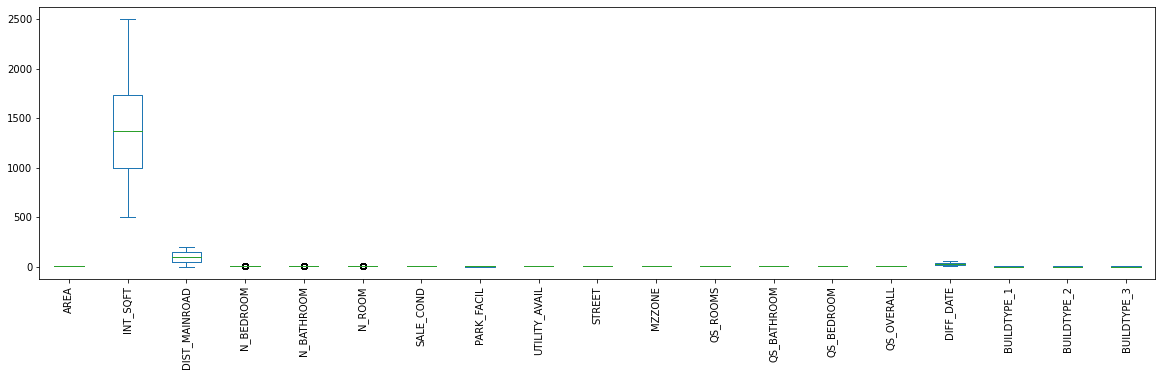

In [53]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

Only INT_SQFT has more scalable range

In [54]:
minmaxData = MinMaxScaler().fit(X_train)
X_train_new = pd.DataFrame(minmaxData.transform(X_train), columns=X_train.columns)
X_test_new = pd.DataFrame(minmaxData.transform(X_test), columns=X_test.columns)

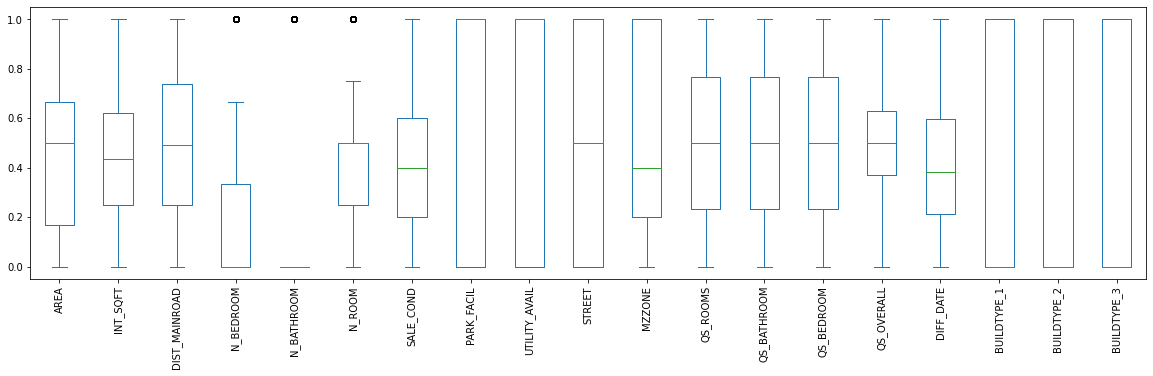

In [55]:
pd.DataFrame(X_train_new, columns=X_train_new.columns).plot.box(figsize=(20,5), rot=90)

MinMAx scaler seemed to made significant changes

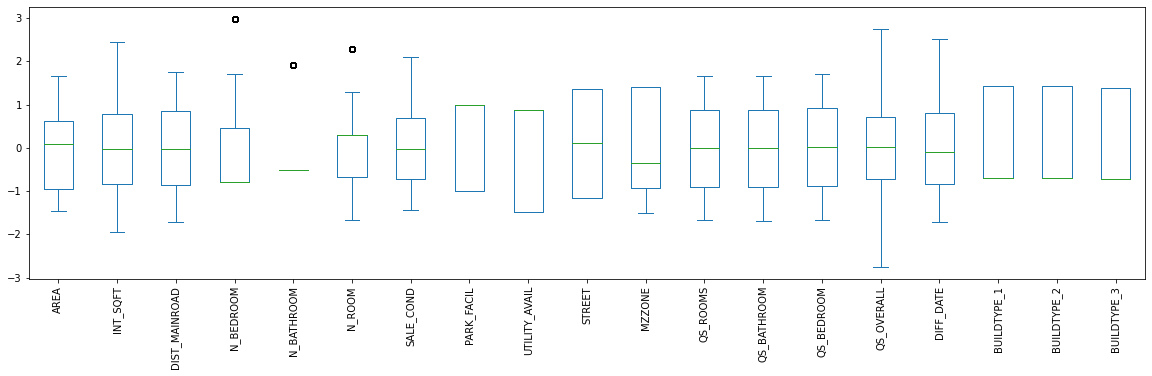

In [56]:
stdScale = StandardScaler().fit(X_train)
X_train_new2 = pd.DataFrame(stdScale.transform(X_train), columns=X_train.columns)
X_test_new2 = pd.DataFrame(stdScale.transform(X_test), columns=X_test.columns)
X_train_new2.plot.box(figsize=(20,5), rot=90)
plt.show()

As standard scaling looks better. We can take that.

## **Model, Loss, Learning and Evaluation**

Model - We are going with Regression models as the Predicted Target is Continous data

Loss funtions used implicitly

LinearRegression

In [57]:
lr = LinearRegression()
lr.fit(X_train_new2, y_train)
y_predlr = lr.predict(X_test_new2)

KNN

In [58]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_new2, y_train)
y_predknn = knn.predict(X_test_new2)

DecisionTree

In [59]:
dt = DecisionTreeRegressor()
dt.fit(X_train_new2, y_train)
y_pred_dt = dt.predict(X_test_new2)

Ensemble Learning - Voting Regressor and Random Forest

In [60]:
vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr)])
vr.fit(X_train_new2, y_train);
y_pred_vr = vr.predict(X_test_new2)
print('R2 score for Voting Regressor :', metrics.r2_score(y_test,y_pred_vr))

R2 score for Voting Regressor : 0.9313068535632829


In [61]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')

rf.fit(X_train_new2, y_train);
y_pred_rf = rf.predict(X_test_new2)
print('R2 score for Random Forest:', metrics.r2_score(y_test,y_pred_rf))

R2 score for Random Forest: 0.9688474494976627


Voting regressor with Random forest

In [62]:
vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf)])
vr.fit(X_train_new2, y_train);
y_pred_vr = vr.predict(X_test_new2)
print('R2 score for Voting Regressor :', metrics.r2_score(y_test,y_pred_vr))

R2 score for Voting Regressor : 0.948328855027836


XG BOOST

In [63]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
dict = {'Learning rate':[],
        'Train score':[],
        'Cross-Val score':[]
       }
  
df_learn = pd.DataFrame(dict)
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train_new2,y_train) #train the model
  model.score(X_test_new2, y_test) # scoring the model - r2 squared
  df_learn.loc[len(df_learn.index)] = [lr,model.score(X_train_new2,y_train), np.mean(cross_val_score(model, X_train_new2, y_train, cv=10))] 
  #print("Learning rate : ", lr, " Train score : ", model.score(X_train_new2,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_new2, y_train, cv=10)))

In [64]:
df_learn

Learning rate  Train score  Cross-Val score
0            0.01    -0.444614        -0.456768
1            0.02     0.702090         0.696553
2            0.03     0.896402         0.891225
3            0.04     0.941828         0.937394
4            0.05     0.958933         0.956054
5            0.06     0.971218         0.967067
6            0.07     0.977101         0.974402
7            0.08     0.983352         0.979313
8            0.09     0.986028         0.983120
9            0.10     0.987709         0.985576
10           0.11     0.990232         0.987612
11           0.12     0.990826         0.988957
12           0.13     0.992453         0.990169
13           0.14     0.992662         0.990739
14           0.15     0.993527         0.991634
15           0.20     0.995629         0.993756
16           0.50     0.996811         0.995032
17           0.70     0.997485         0.993789
18           1.00     0.995952         0.989571

In [65]:
df_learn['diff'] = df_learn['Train score'] - df_learn['Cross-Val score']
df_learn.loc[df_learn['diff'] == min(df_learn['diff'])]

Learning rate  Train score  Cross-Val score      diff
16            0.5     0.996811         0.995032  0.001779

In [66]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100, verbosity = 0)
model.fit(X_train_new2, y_train)
y_pred_gbr = model.predict(X_test_new2)
print('R2- Score:', metrics.r2_score(y_test,y_pred_gbr))

R2- Score: 0.9952037783312879


## **Evaluation metrics**

Finally evaluation metrics for different models and different results were derived and verified.




In [93]:
dict = {'Learning_Model':['linear Regression','KNN','DecisionTree','Random Forest','VR','XG Boost'],
        'R2_Score':[metrics.r2_score(y_test,y_predlr),metrics.r2_score(y_test,y_predknn), metrics.r2_score(y_test,y_pred_dt),metrics.r2_score(y_test,y_pred_rf), metrics.r2_score(y_test,y_pred_vr), metrics.r2_score(y_test,y_pred_gbr)]
       }
final_scores = pd.DataFrame(dict)
final_scores

Learning_Model  R2_Score
0  linear Regression  0.854971
1                KNN  0.813940
2       DecisionTree  0.952426
3      Random Forest  0.968847
4                 VR  0.948329
5           XG Boost  0.995204

# Feature Importance for XG boost

In [94]:
feat_imp = model.get_booster().get_score(importance_type='weight')
feat_imp

{'INT_SQFT': 177,
 'BUILDTYPE_1': 50,
 'AREA': 82,
 'MZZONE': 86,
 'N_ROOM': 12,
 'PARK_FACIL': 23,
 'BUILDTYPE_3': 22,
 'STREET': 32,
 'N_BEDROOM': 7,
 'DIFF_DATE': 57,
 'SALE_COND': 30,
 'N_BATHROOM': 3,
 'UTILITY_AVAIL': 17,
 'QS_OVERALL': 30,
 'QS_ROOMS': 14,
 'BUILDTYPE_2': 9,
 'QS_BATHROOM': 12,
 'DIST_MAINROAD': 24,
 'QS_BEDROOM': 11}

In [95]:
model.feature_importances_

array([9.7992040e-02, 8.0623150e-02, 1.5837756e-04, 1.6400270e-02,
       3.9898315e-03, 3.5224935e-01, 4.8964308e-03, 3.7661292e-02,
       2.0673152e-03, 1.9726889e-02, 4.1042462e-02, 2.5950209e-04,
       2.2444257e-04, 1.4493366e-04, 4.7866476e-04, 4.9483473e-03,
       3.1405288e-01, 1.1196585e-03, 2.1964259e-02], dtype=float32)

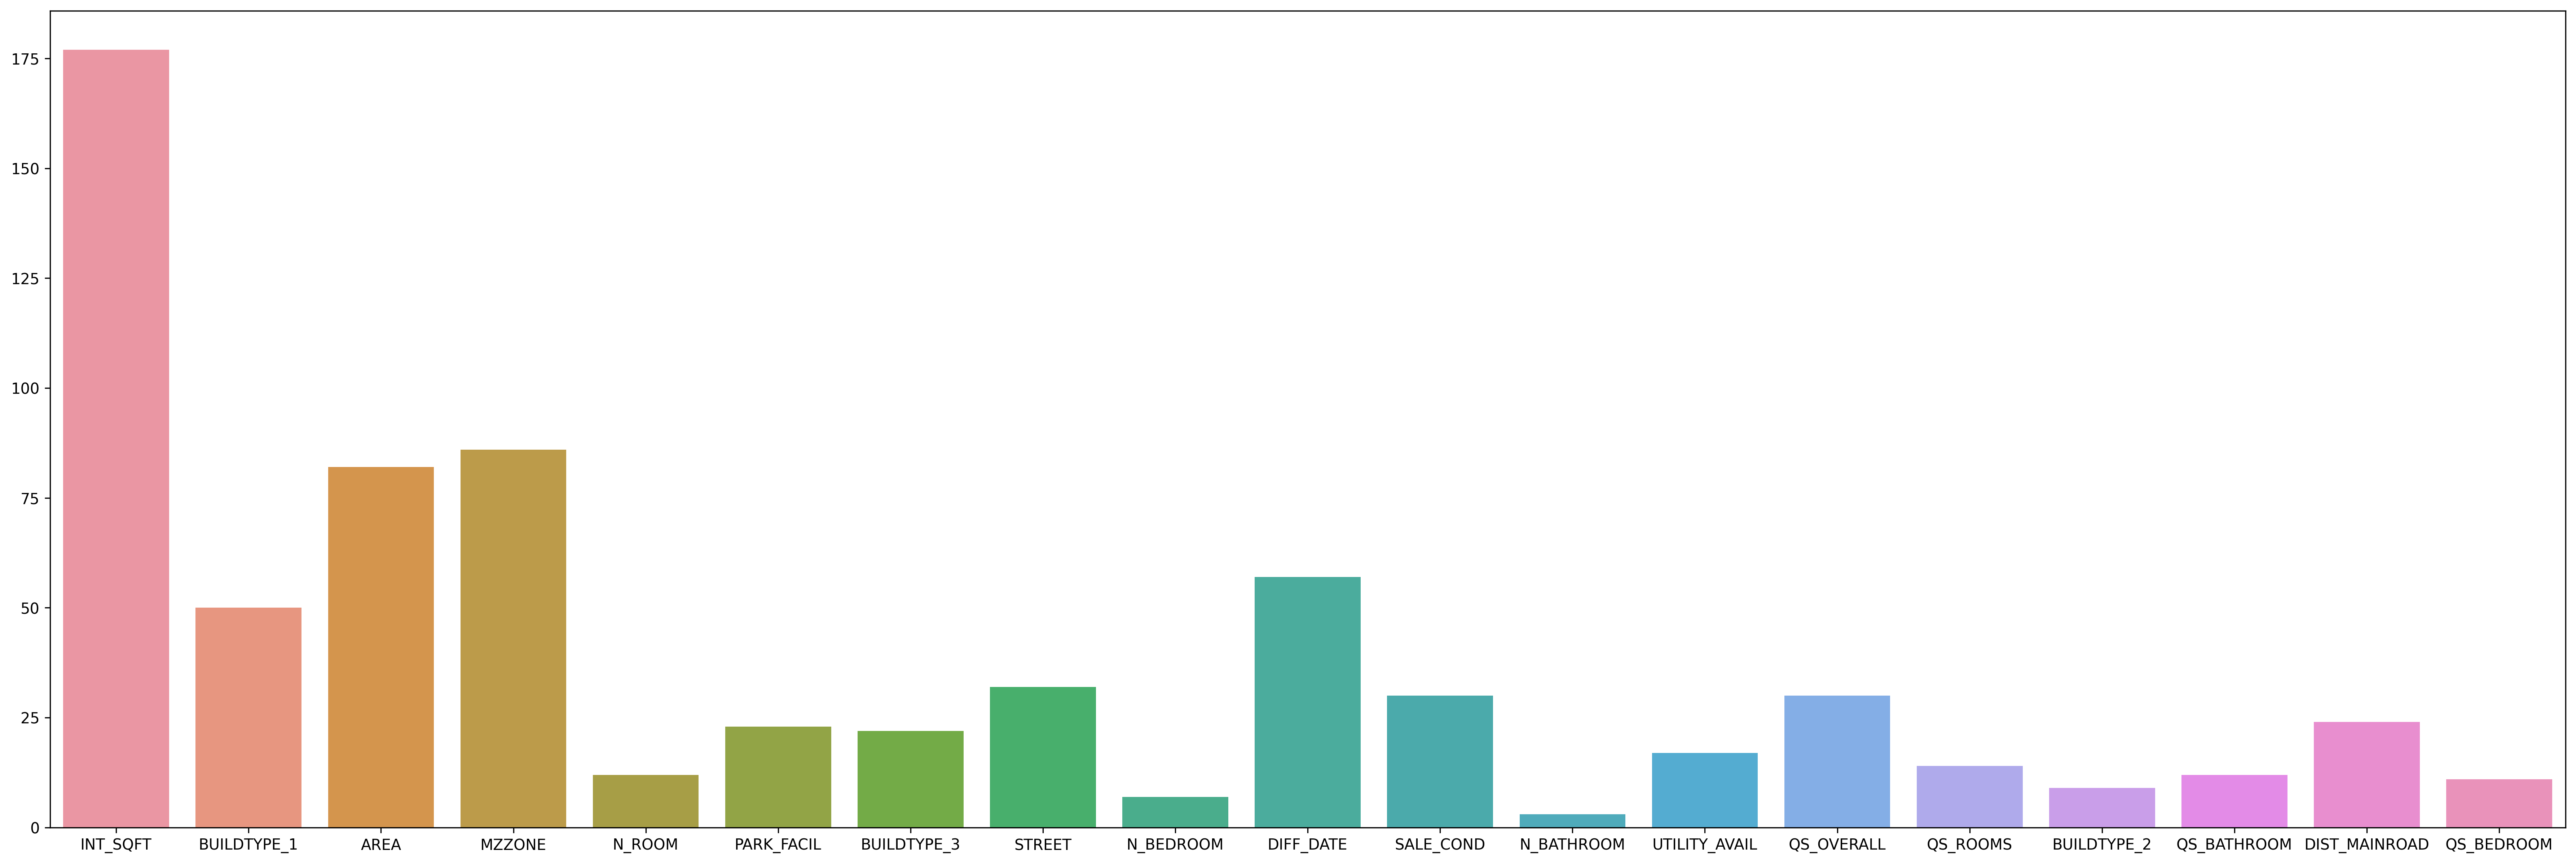

In [105]:
plt.figure(figsize=(30, 10), dpi=300)
sns.barplot(x=pd.Series(feat_imp.keys()), y=pd.Series(feat_imp.values()))

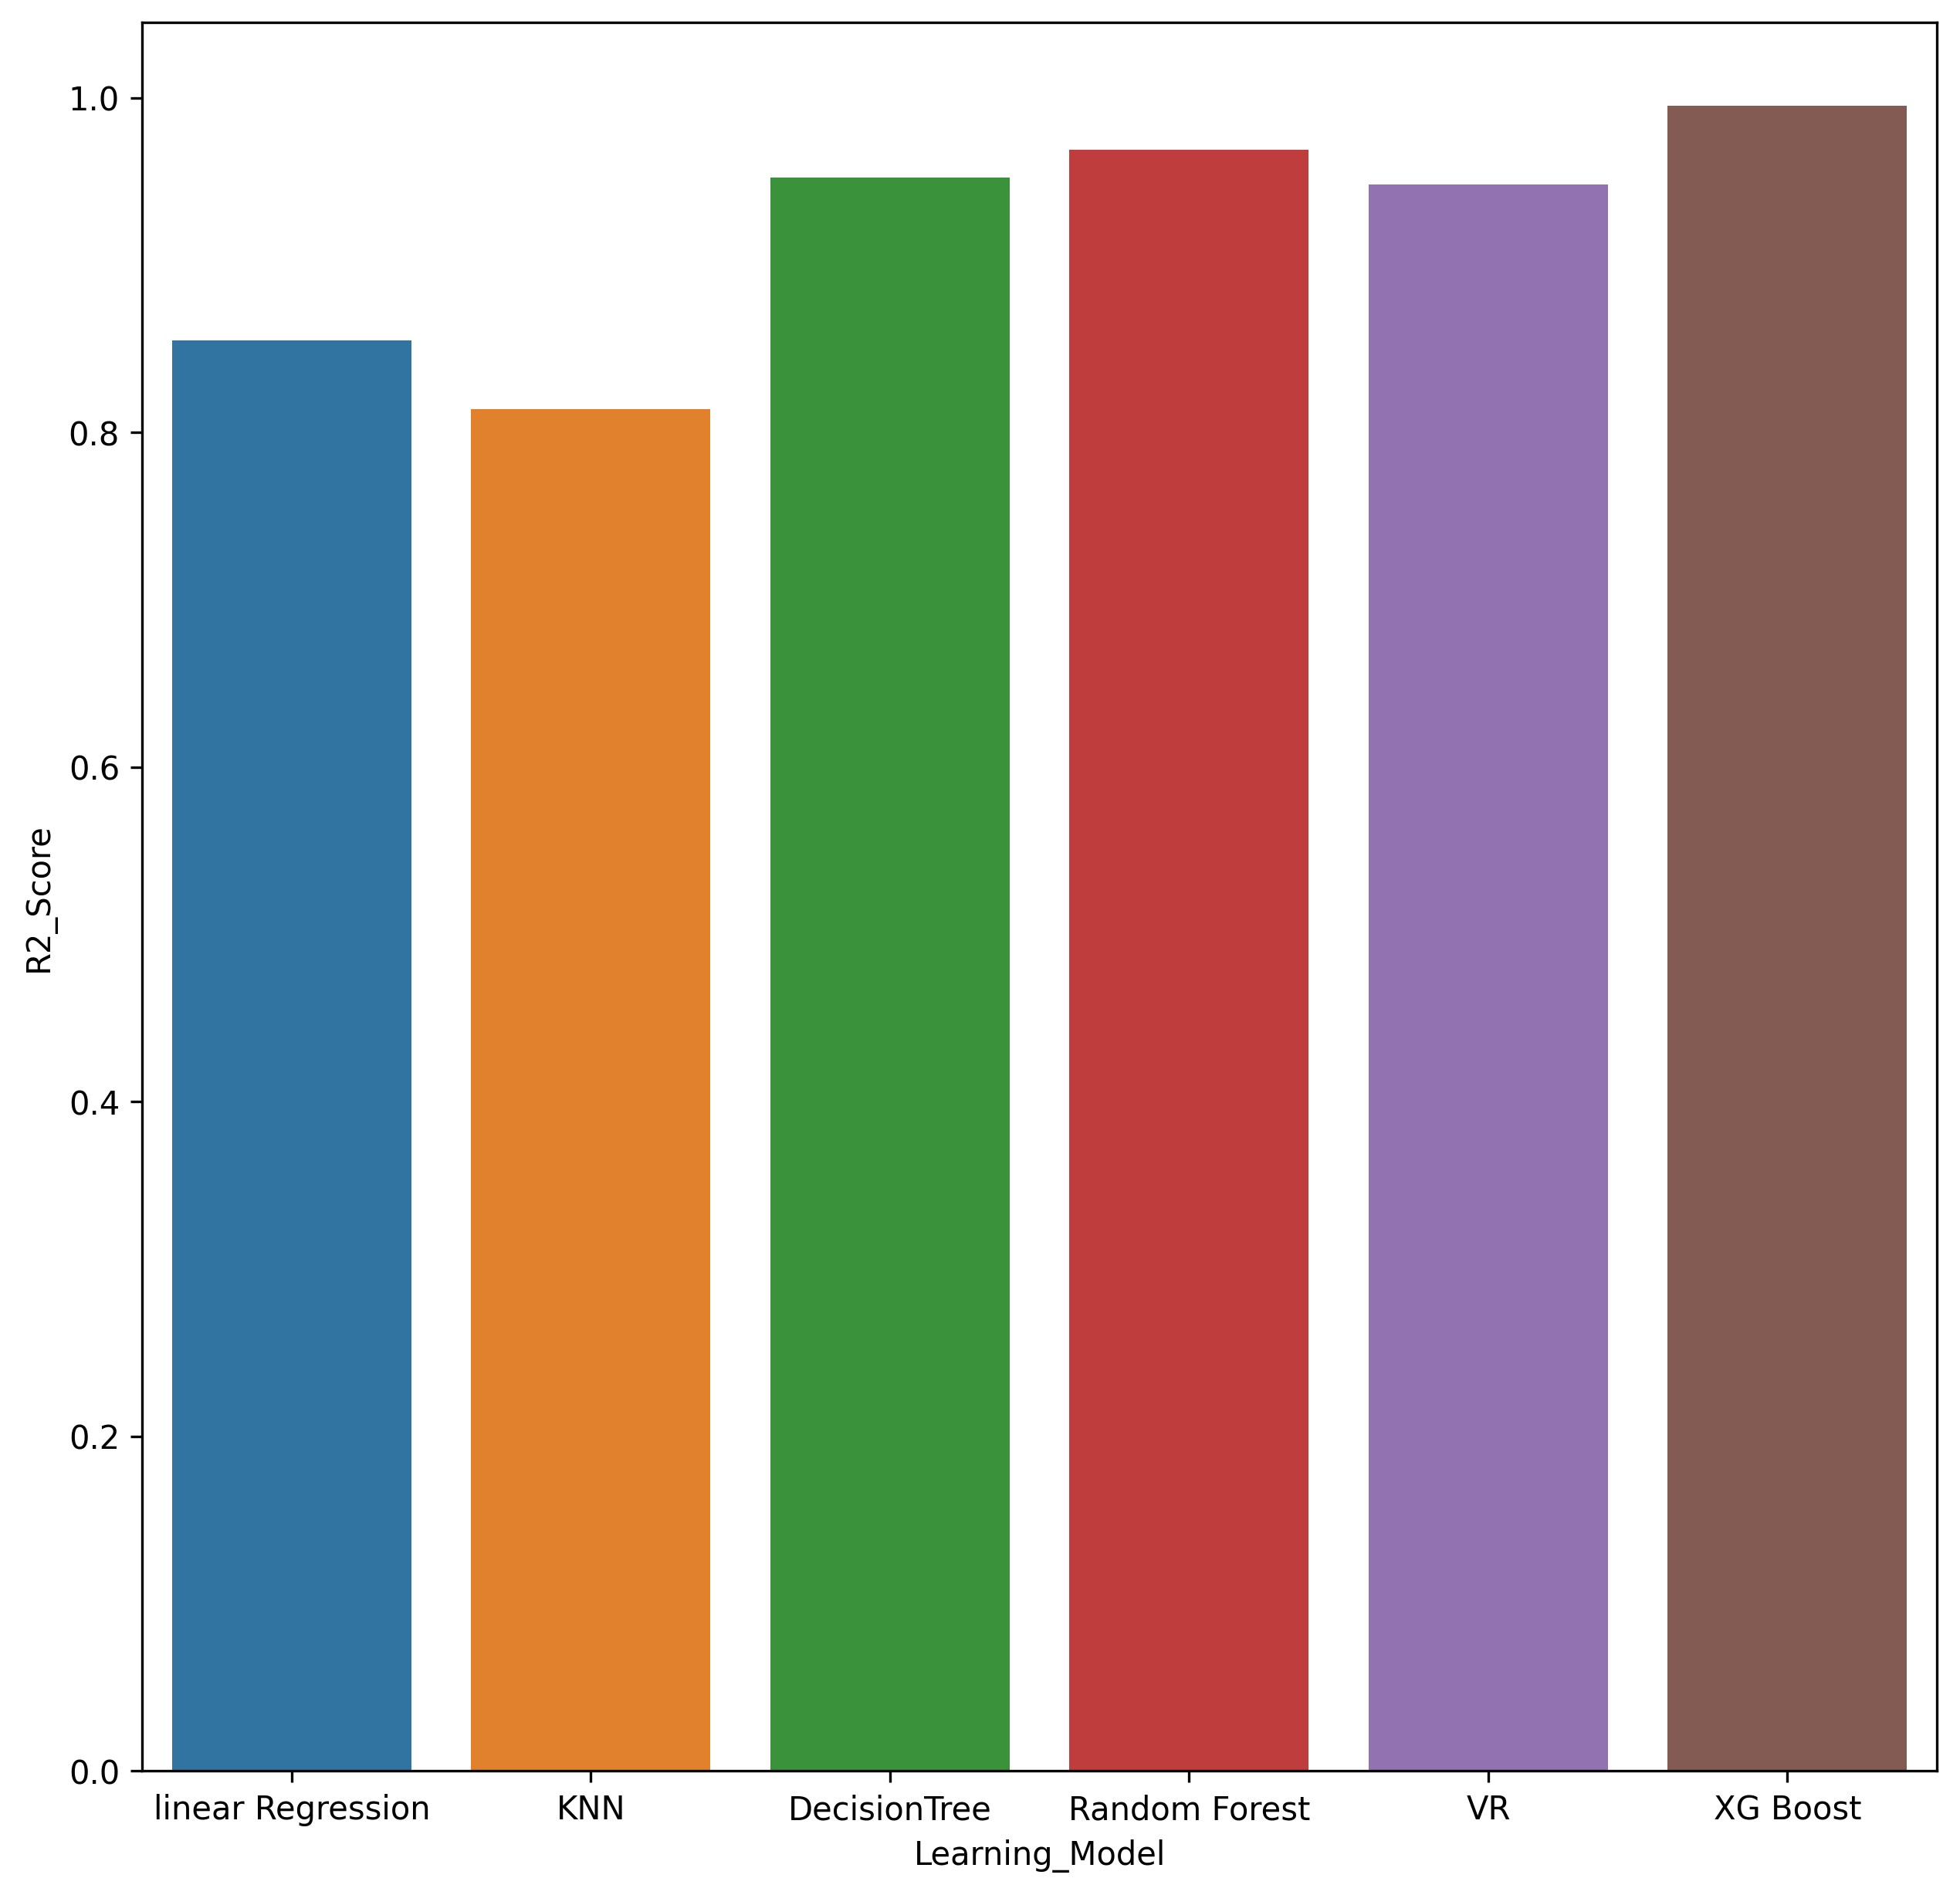

In [101]:
plt.figure(figsize=(10, 10), dpi=300)
sns.barplot(x=final_scores.Learning_Model,y=final_scores.R2_Score)

### **Conclusion**

## From the R2 Score wecan conclude XG boost has a ** **bold text**better R2 score 0.9952037783312879**

Based on the R2 score we can predict the price with the given set factors like 

From the feature importance we can take features or factors like 
INT_SQFT,
BUILDTYPE,
AREA,
MZZONE,
DIFF_DATE (Age since built), and
SALE_COND


From the above important list of factors which contributes to the sales price one must take these into consideration

We can predict with 99.52% accurately. Thus I conclude this Project.